# Кинопрокат
Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` *—* объём возвратных средств государственной поддержки;
- `nonrefundable_support` *—* объём невозвратных средств государственной поддержки;
- `financing_source` *—* источник государственного финансирования;
- `budget` *—* общий бюджет фильма;
- `ratings` *—* рейтинг фильма на КиноПоиске;
- `genres` *—* жанр фильма.

Обратите внимание, что столбец `budget` **уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

# Задание № 0

С помощью библиотеки pandas (импортирована под алиасом pd)
* прочитайте данные из csv-файлов mkrf_movies.csv и mkrf_shows
* запишите датафреймы в переменные movies_df и shows_df соответственно

In [130]:
import numpy as np
import pandas as pd

movies_df = pd.read_csv('mkrf_movies.csv')
shows_df = pd.read_csv('mkrf_shows.csv')

# Задание № 1

### Опишите проблемы типов имеющихся данных и варианты исправления

### Исследуйте дубликаты и пропуски. Какова их природа в этом наборе данных? Можно ли это исправить?

Использовать методы
* duplicated и/или смежные (drop_duplicates)
* isna() и/или смежные

Ссылки:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html


Что может ещё понадобиться:

* Преобразование к численным типам данных. Для этого можно
    * воспользоваться методом **to_numeric**, аналогичным **to_datetime**, в связке с методом **apply**
    * воспользоваться методом astype('int64')
* Сброс данных (drop)
    
Ссылки:

https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html#pandas.DataFrame.astype

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [13]:
movies_df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [131]:
# Решаем проблемы типизации
movies_df['show_start_date'] = pd.to_datetime(movies_df['show_start_date'])
movies_df['puNumber'] = movies_df['puNumber'].apply(pd.to_numeric, errors='coerce')
movies_df['ratings'] = movies_df['ratings'].str.strip('%')
movies_df['ratings'] = movies_df['ratings'].apply(pd.to_numeric, errors='coerce')
movies_df['ratings'].loc[movies_df['ratings'] > 10] = movies_df['ratings'].loc[movies_df['ratings'] > 10] / 10

/var/folders/25/hkg7hrfn7130z9vkbc1z1h580000gn/T/ipykernel_8438/2919454165.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['ratings'].loc[movies_df['ratings'] > 10] = movies_df['ratings'].loc[movies_df['ratings'] > 10] / 10


In [26]:
# Полных дубликатов нет
movies_df_dup = movies_df.drop_duplicates()
movies_df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7485 non-null   float64            
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [28]:
# Смущает лишь дупликаты puNumber
for column in movies_df:
    print(column, movies_df[column].duplicated().sum())

title 714
puNumber 2
show_start_date 5521
type 7478
film_studio 1995
production_country 6535
director 2674
producer 2136
age_restriction 7481
refundable_support 7451
nonrefundable_support 7410
budget 7195
financing_source 7482
ratings 7405
genres 6743
                                             title     puNumber  \
0                                 Открытый простор  221048915.0   
1                             Особо важное задание  111013716.0   
2                                     Особо опасен  221038416.0   
3                                     Особо опасен  221026916.0   
4                                     Особо опасен  221030815.0   
...                                            ...          ...   
7481     Сад художника: Американский импрессионизм  126008019.0   
7482                               Звериная ярость  121037819.0   
7483     Щенячий патруль: Скорей спешим на помощь!  124010819.0   
7484      Машины песенки. Серия "Испанские мотивы"  124010619.0   
7485  Машин

In [30]:
movies_df_without_duplicates = movies_df.drop_duplicates(subset=['puNumber'])

In [32]:
shows_df

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
...,...,...
3153,224014814,1.530000e+03
3154,224021411,9.270000e+03
3155,224022410,4.000000e+02
3156,224023210,3.600000e+02


In [18]:
shows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [21]:
# Кажется все в порядке
shows_df_without_duplicated = shows_df.drop_duplicates(keep='last')
shows_df_without_duplicated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 74.0 KB


In [34]:
# Ничего интересного
for column in shows_df:
    print(column, shows_df[column].duplicated().sum())

puNumber 0
box_office 220


# Задание № 2

### Посчитайте динамику сборов по годам премьер фильмов. В каком году медианная сумма сборов была максимальной?

**Было бы здорово визуализировать результаты!**

Что может понадобиться:

* Сортировки данных методом **sort_values** (с обязательных указанием по какому индексу или столбцу)
* Удаление дубликатов методом **drop_duplicates**
* Слияние или объединение DataFrame или Series методами **merge** и **join** (первого должно хватить)
* Переименование столбка методом **rename**
* **Самое важное**: группировка данных методом **groupby**
    * обратите особое внимание на аргументы by и as_index
    * по сути это операция разбиения данных, применения некоторой функции и объединение результатов
    * примеры использтвания будут в смежном файле

Ссылки:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html



In [85]:
# Отсортированные фильмы по дням премьеры (без дупликатов)
premiere_movies = movies_df.sort_values(by='show_start_date')
premiere_movies = premiere_movies.drop_duplicates(subset=['title'])
premiere_movies

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4456,Книга Илая,121000210.0,2010-01-11 12:00:00+00:00,Художественный,"Элкон Интертейнмент, Силвер Пикчерз",США,"Алберт Хьюз, Эллен Хьюз","Бродерик Джонсон, Джоэл Силвер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"фантастика,боевик,драма"
4332,Вечный зов.,213000210.0,2010-01-13 12:00:00+00:00,Художественный,"ОАО ""Леннаучфильм""",Россия,"В.Ефремов, И.Ефремова, В.Лопач",В.Бажин,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.3,драма
4466,Последний король Шотландии,221002410.0,2010-01-13 12:00:00+00:00,Художественный,"Дэ Эн А Филмз, Фокс Серчлайт Пикчерз, Филм Фо,...",Великобритания - США,Кевин МакДональд,"Лиза Брайер, Андреа Колдервуд, Кристин Рупперт...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,драма,биография"
4409,Другой мужчина,221009610.0,2010-01-14 12:00:00+00:00,Художественный,"Готэм Продакшнз, Рэйнмарк Филмз, Илинг Студиос...",США - Великобритания,РичардЭйр,"Ричард Эйр, Майкл Дрейер, Фрэнк Дулгер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.9,"триллер,драма,мелодрама"
4334,Бомж.,211000910.0,2010-01-14 12:00:00+00:00,Художественный,"ООО ""Студия ""Панорама""",Россия,А.Богданов,"ООО ""Форвард-Фильм""",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.0,"боевик,триллер,криминал"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219.0,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN
7467,Жёлтый клевер,111022219.0,2019-12-27 12:00:00+00:00,Художественный,Соломатина Людмила Леонидовна,Россия,Л.Соломатина (Томилова),Л.Соломатина (Томилова),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819.0,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619.0,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
movies_premiere_with_box_office = pd.merge(premiere_movies, shows_df, on='puNumber', how='inner')
movies_premiere_with_box_office

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Душевная кухня,121000610.0,2010-01-19 12:00:00+00:00,Художественный,"Корасон Интертейнмент, Дорие Филм, Пирамид Про...",Германия,Фатих Акин,"Фатих Акин, Клаус Маек",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"драма,комедия",4.200000e+02
1,"Легион_.(Фильм содержит сцены ужасов, насилия ...",121000310.0,2010-01-25 12:00:00+00:00,Художественный,Болд Филмз,США,Скотт Стюарт,"Дэвид Ланкастер, Майкл Литвак",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,5.600000e+02
2,Из Парижа с любовью,121001310.0,2010-01-26 12:00:00+00:00,Художественный,Европа Корпорейшн,Франция,Пьер Морель,"Люк Бессон, Индия Осборн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,"боевик,триллер,комедия",1.585000e+03
3,Золотое сечение,111000610.0,2010-01-26 12:00:00+00:00,Художественный,"ОАО ""ТПО ""Санкт-Петербургская студия документа...",Россия,С.Дебижев,"А.Тельнов, С.Федотов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,4.9,приключения,7.600000e+02
4,Буду помнить,111000910.0,2010-01-28 12:00:00+00:00,Художественный,"ООО ""ГРИНСИТИ""",Россия,В.Воробьев,А.Сафронов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,военный,3.217500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,Небо измеряется милями,111021919.0,2019-12-19 12:00:00+00:00,Художественный,"ООО ""РБ ПРОДАКШН""",Россия,К.Буслов,К.Буслов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.5,"военный,история",3.672240e+05
3099,Иван Царевич и Серый Волк 4,114005019.0,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08
3100,Фиксики против кработов,114004819.0,2019-12-21 12:00:00+00:00,Анимационный,"АО ""Аэроплан""",Россия,"В.Бедошвили, О.Ужинов, И.Пшонкин, Д.Цыбулькин","Г.Васильев, С.Саркисов, И.Попов",«6+» - для детей старше 6 лет,80000000.0,40000000.0,270000000.0,Фонд кино,7.5,"мультфильм,детский,приключения",3.875905e+08
3101,Акрам Хан: Родом из Карри Хауса,126007919.0,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,2.195690e+05


In [ ]:
movies_premiere_with_box_office['premiere_year'] = movies_premiere_with_box_office['show_start_date'].dt.year
box_office_medians = movies_premiere_with_box_office.groupby('premiere_year')['box_office'].median()
box_office_medians.nlargest(3)

<AxesSubplot: xlabel='premiere_year'>

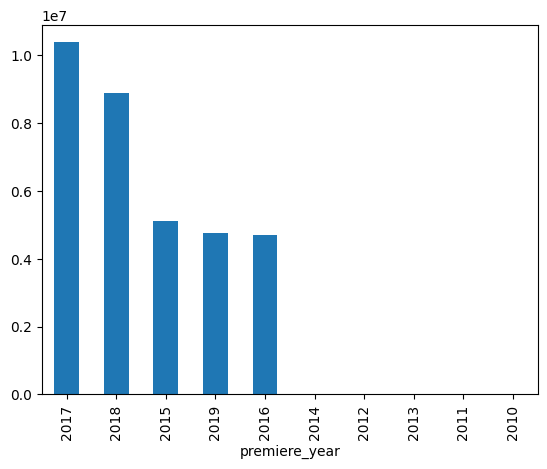

In [87]:
box_office_medians.sort_values(ascending=False).plot.bar()

# Задание № 3

### С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

**Было бы здорово визуализировать результаты!**

Что может понадобиться:
* См. Задание № 2

In [105]:
merged = movies_df.merge(shows_df,how='inner', on='puNumber')
merged['premiere_year'] = merged['show_start_date'].dt.year
grouped = merged.groupby('premiere_year')['box_office']
mean = grouped.mean().sort_values(ascending=False)
mean

premiere_year
2017    1.360328e+08
2018    1.045651e+08
2019    9.136926e+07
2016    9.100057e+07
2015    8.494057e+07
2014    2.668442e+07
2013    1.619549e+05
2011    1.293832e+05
2012    5.433924e+04
2010    2.313004e+04
Name: box_office, dtype: float64

<AxesSubplot: xlabel='premiere_year'>

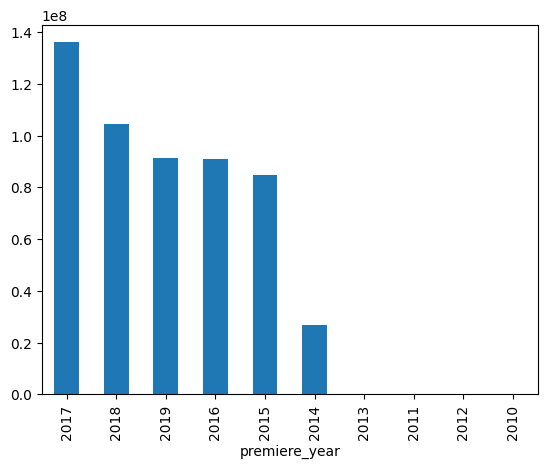

In [106]:
mean.plot.bar()

In [111]:
median = grouped.median().sort_values(ascending=False)
median

premiere_year
2010       1700.000
2011       3000.000
2012       5660.000
2013       3522.500
2014      18160.000
2015    4920933.000
2016    3846679.410
2017    9968340.000
2018    8891102.210
2019    4627798.345
Name: box_office, dtype: float64

<AxesSubplot: xlabel='premiere_year'>

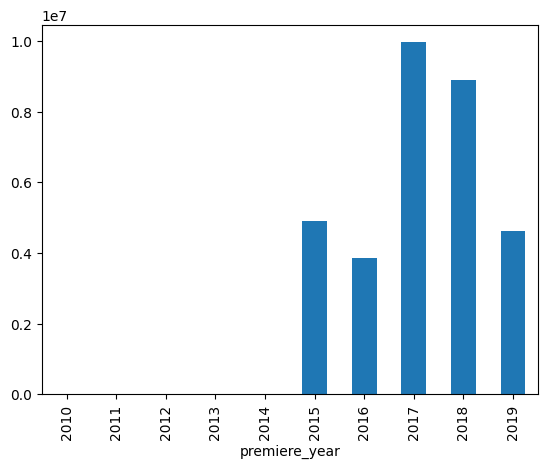

In [112]:
median.plot.bar()

# Задание № 4

### Выделите имена продюсеров из столбца producer. У кого из них самый высокий средний рейтинг фильмов?


Что может понадобиться:
* См. Задание № 2

In [133]:
movies_df['director_split'] = movies_df['director'].str.split(', ')
director_ratings = movies_df[['director_split', 'ratings']]
director_ratings

,director_split,ratings
0,[Кевин Костнер],7.2
1,[Е.Матвеев],6.6
2,[Тимур Бекмамбетов],6.8
3,[Тимур Бекмамбетов],6.8
4,[Тимур Бекмамбетов],6.8
...,...,...
7481,[Фил Грабски],NaN
7482,[Ник Пауэлл],5.4
7483,[Чарльз Е.Бастьен],NaN
7484,[А.Беляев],NaN


In [134]:
director_ratings = director_ratings.explode('director_split')
director_ratings.groupby('director_split')['ratings'].mean().sort_values(ascending=False)

director_split
Е.Шиляева                                         9.9
Эктор Бабенко                                     9.9
Т.Мирошник                                        9.9
Е.Олейник                                         9.8
Е.Климович                                        9.8
                                                 ... 
хореография Питера Райта                          NaN
хореография Пьера Лакотта по Филиппу Тальони      NaN
хореография Рудольфа Нуреева по Мариусу Петипа    NaN
хореография Фредерика Аштона                      NaN
хореография Фредерика Эштона                      NaN
Name: ratings, Length: 5728, dtype: float64